In [47]:
import tensorflow as tf 
import keras
import numpy as np
import matplotlib.pyplot as plt

In [48]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
      lim=0.98
      if logs.get('accuracy') >= lim:
        self.model.stop_training= True

callbacks = myCallback()

In [49]:
#uploading the dataset from MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images, test_labels) = fashion_mnist.load_data()

Label:3

Image Pixel Array:
[[  0   0   0   0   0   0   0   0   0  58 172 137  44  17  30  22 164 195  82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 239 240 227 254 255 254 210 227 243 216   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   2   0 162 230 214 220 216 222 230 215 233 137   0   4   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 233 217 223 219 222 223 217 231 170   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 148  98 215 226 218 222 220 220 223 220 229 245   8  91  65   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 227 247 229 217 220 222 219 218 221 222 218 225 230 253 197   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18 228 229 229 222 214 218 216 215 221 219 219 228 236 229 183   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70 242 208 108 254 217 224 220 219 224 219 242 187 182 251 210   0   0   0   0   0   0]
 [  0   0   0   0   0   0 162 244 191  45 255 219 22

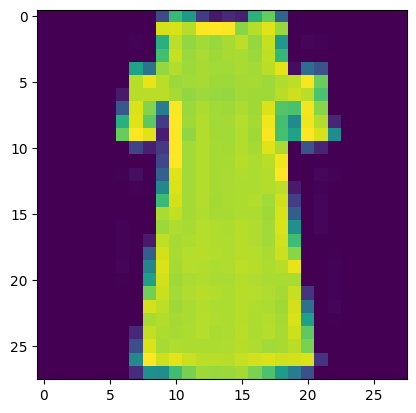

In [4]:
#visualizing the dataset
index = np.random.randint(6000)


#set numbers of characters per row when printing 
np.set_printoptions(linewidth=320)

#printout the labels and images
print(f'Label:{training_labels[index]}')
print(f'\nImage Pixel Array:\n{training_images[index]}')

#visualize
plt.imshow(training_images[index])

In [41]:
#normalize the pixels values
train_images = training_images /255.0

test_images = test_images /255.0

In [50]:
#Bulid the classification model
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [51]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [52]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 4.0515 - accuracy: 0.7349
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5865 - accuracy: 0.7942
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5449 - accuracy: 0.8080
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5233 - accuracy: 0.8194
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8269
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8324
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4762 - accuracy: 0.8378
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4746 - accuracy: 0.8392
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4645 - accuracy: 0.8406
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.465

In [53]:
#evaluate the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.8219


[0.5465072989463806, 0.8219000101089478]

313/313 [==============================] - 1s 2ms/step
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
labels: 9


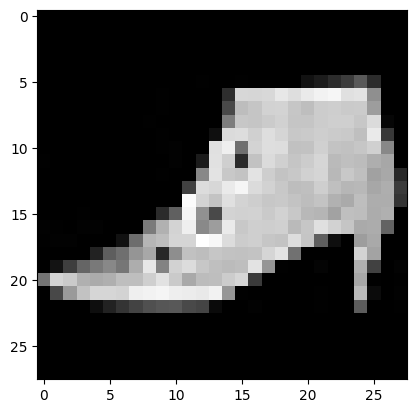

In [63]:
classification = model.predict(test_images)
index_g = np.random.randint(1000)

print(np.round(classification[index_g]))


#plt.imshow(test_images[index_g])
print(f'labels: {test_labels[index_g]}')
image = test_images[index_g]
fig = plt.figure
plt.imshow(image,cmap='gray')
plt.show()
